<a href="https://colab.research.google.com/github/GrimWatch/ai-tests/blob/main/ml_lets_goo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
#commit by grim

In [112]:
url = "https://raw.githubusercontent.com/GrimWatch/ai-tests/main/housing.csv"
data = pd.read_csv(url)
data['index'] = data.index

In [116]:
data = data.dropna()

In [117]:
data.isnull().sum().sum()

0

In [118]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,index
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [119]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,index
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,10316.176088
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,5956.699278
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,5162.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,10319.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,15473.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,20639.000000


In [38]:
d = data['total_bedrooms'].value_counts()
print(d)


280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64


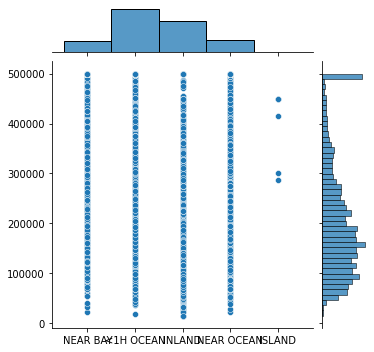

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [71]:
sns.jointplot(x=data.ocean_proximity.values, y=data.median_house_value.values, height=5)
plt.ylabel("price")

plt.xlabel("ocean")
plt.show()
sns.despine

In [120]:
labels = data['median_house_value']
conv_ocean = [3 if values == "<1H OCEAN" else 2 if values == "INLAND" 
              else 1 if values == "NEAR OCEAN" 
              else 0 for values in data.ocean_proximity ]
data['ocean_proximity'] = conv_ocean
train1 = data.drop(['index','median_house_value'],axis =1)

In [74]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,index
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,4


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels ,test_size = 0.10, random_state = 2)

In [96]:

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [97]:
clean_dataset(x_train)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
594,-122.08,37.71,38.0,1663.0,295.0,781.0,301.0,5.0519,0.0
7981,-118.17,33.87,45.0,2110.0,494.0,1404.0,454.0,2.9803,3.0
18987,-121.94,38.37,14.0,1156.0,216.0,574.0,227.0,3.2396,2.0
5376,-118.39,34.04,52.0,1492.0,277.0,666.0,289.0,4.7386,3.0
19796,-123.18,40.58,18.0,1451.0,278.0,695.0,254.0,1.7262,2.0
...,...,...,...,...,...,...,...,...,...
1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,2.0
18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,0.0
11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,2.0
6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,3.0


In [123]:
np.any(np.isnan(x_train))

False

In [124]:
np.any(np.isnan(y_train))

False

In [125]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [126]:
reg.fit(x_train,y_train)

LinearRegression()

In [127]:
reg.score(x_test,y_test)

0.6184121512953653

In [ ]:
from sklearn import ensemble

In [ ]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400 , max_depth = 5,
      min_samples_split =2, learning_rate = 0.1 , loss = 'ls')

In [ ]:
clf.fit(x_train,y_train)

ValueError: ignored